## IS 362 Assignment Week 8
### Alexander Doler

In this first cell we import the necessary libraries and import the dataset as a FWF file.

In [419]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

autos = pd.read_fwf("https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data", header=None, names=["MPG", "Cylinders",
                                                                                                                            "Displacement", "Horsepower",
                                                                                                                            "Weight", "Acceleration",
                                                                                                                   "Model year", "Origin", "Car name"])

autos.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model year,Origin,Car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""


Here we replace the "?" values with Nan values. The NaN values are then converted to a numeric type in order to perform mathematical operations on the columns containing them.

In [410]:
autos.replace(to_replace='?', value=np.NaN, inplace=True)
autos.loc[:, 'MPG':'Origin'].apply(pd.to_numeric)
#The above line of code does not seem to work properly. It is necessary to convert the Horsepower column in to a numeric
#format as it contains NaN values that prevent analysis.
autos.Horsepower = pd.to_numeric(autos.Horsepower)


Here we replace the number 1-3 in the "Origin" column with their corresponding country/continent.

In [420]:
autos.Origin.replace(to_replace=1, value='USA', inplace=True)
autos.Origin.replace(to_replace=2, value='Asia', inplace=True)
autos.Origin.replace(to_replace=3, value='Europe', inplace=True)
autos.head()  

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model year,Origin,Car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA,"""ford torino"""


In the three cells below, we present bar graphs that show the number of cylinders in each of the three regions. As we can see, the US has more 6 and 8 cylinder cars, while 4-cylinder cars are dominant in Europe and Asia. Also, 5-cylinder cars are only in Asia and 3-cylinder cars are only in Europe.

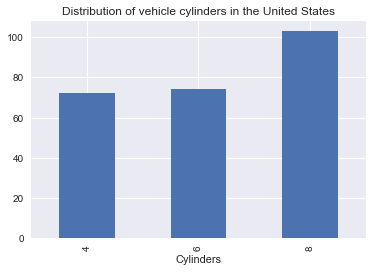

In [412]:
grouped = autos.groupby("Origin")

usaCylinders = grouped.get_group('USA').groupby('Cylinders').size().plot(kind="bar", title="Distribution of vehicle cylinders in the United States")


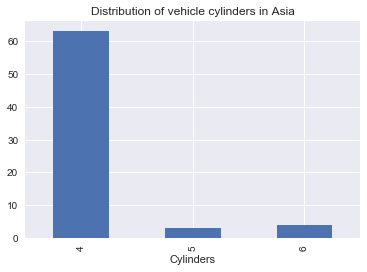

In [413]:
asiaCylinders = grouped.get_group('Asia').groupby('Cylinders').size().plot(kind="bar", title="Distribution of vehicle cylinders in Asia")


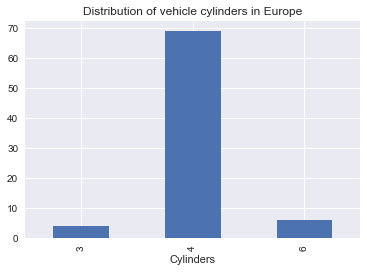

In [414]:
europeCylinders = grouped.get_group('Europe').groupby('Cylinders').size().plot(kind="bar", title="Distribution of vehicle cylinders in Europe")

The two cells below are two different ways of creating a scatter plot using Matplolib. The scatterplots are the same. As we can see, the relationship between weith and horsepower is a positive one. Both tend to increase together. This is easy to understand, as it common sense that the heavier a car is, the more power it will need in order to handle its weight.

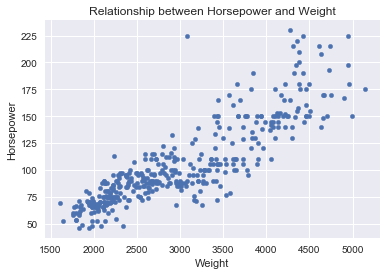

In [415]:
autos.plot(kind='scatter', x=4, y=3, title="Relationship between Horsepower and Weight")

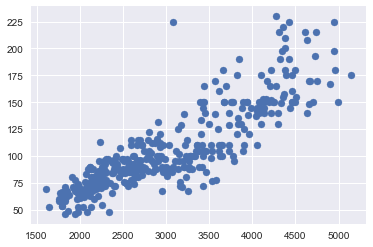

In [416]:
plt.scatter(autos.Weight, autos.Horsepower)



In [417]:
mdlYear = autos.groupby('Model year').mean()
avgMPG = mdlYear.MPG
avgWeight = mdlYear.Weight

The plot below is divided into two subplots. The x-axis on both plots shows the years from 1970-1982. The y-axis on the plot above shows MPG and the plot below, average car weight. As we can see, over this time period, cars tended to get lighter and average MPG also increased. It is likely that lighter cars translates into increased MPG, but further analysis would be needed in order to determine whether this relationship is direct, indirect or pure coincidence.

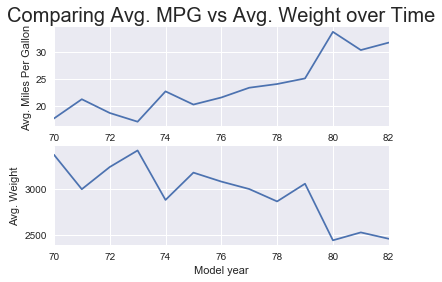

In [418]:
ax1 = plt.subplot2grid(shape=(2,1), loc=(0,0))
ax2 = plt.subplot2grid(shape=(2,1), loc=(1,0))
ax1.set_ylabel('Avg. Miles Per Gallon')
ax2.set_ylabel('Avg. Weight')
#ax3 = plt.subplot2grid(shape=(4,3), loc=(0,3))
#plt.xlabel('Year')
#plt.ylabel('None')
#plt.show()
plt.title('Comparing Avg. MPG vs Avg. Weight over Time', size=20, y=2.2)
avgMPG.plot(ax=ax1)
avgWeight.plot(ax=ax2)
